In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_json("../assets/clean_reviews.json", orient='records')
data

,reviewid,title,artist,score,author,review_publication_date,genre,song_release_year,record_label,review_content
0,22703,mezzanine,massive attack,9.3,nate patrin,1483833600000,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,1483747200000,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,1483747200000,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,1483660800000,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,1483660800000,electronic,2016,teklife,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...,...
18412,1535,let us replay!,coldcut,8.9,james p. wisdom,917308800000,jazz|electronic,None,ninja tune,The marketing guys of yer average modern megac...
18413,1341,1999,cassius,4.8,james p. wisdom,917308800000,electronic,None,astralwerks,"Well, it's been two weeks now, and I guess it'..."
18414,5376,out of tune,mojave 3,6.3,jason josephes,916099200000,rock,None,4ad,"Out of Tune is a Steve Martin album. Yes, I'l..."
18415,2413,"singles breaking up, vol. 1",don caballero,7.2,james p. wisdom,916099200000,rock|metal|experimental,1999,touch and go,"Well, kids, I just went back and re-read my re..."


In [6]:
genres = np.array(list(map(str, data['genre'])))
rating = list(data['score'])
for a in np.flatnonzero(np.core.defchararray.find(genres,'|')!=-1):
    string = genres[a]
    split = np.array(string.split("|"))
    genres = np.concatenate((genres, split))
    for i in split:
        rating.append(rating[a])

ratings = np.array(rating)
rating = np.take(ratings, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))
genress = np.take(genres, np.flatnonzero(np.core.defchararray.find(genres,'|')==-1))

print(np.flatnonzero(np.core.defchararray.find(genress,'|')!=-1))
unique = np.unique(genress)
print(len(unique))
amount = []
for name in unique:
    amount.append(np.average(rating[genress == name]))
    
amount = np.array(amount)

[]
10


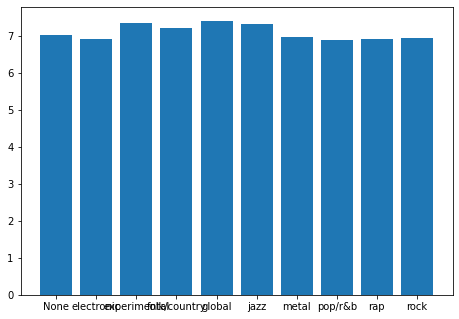

['None' 'electronic' 'experimental' 'folk/country' 'global' 'jazz' 'metal'
 'pop/r&b' 'rap' 'rock']


In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique, amount)
plt.show()
print(unique)

In [19]:
print(amount[np.where(unique == 'rock')])
print(amount[np.where(unique == 'global')])

[9450]
[231]
